In [20]:
import random
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import math
import quandl
from scipy.stats import norm
quandl.ApiConfig.api_key = 'nsqaaHBqkWMWVvYEH9-9'


In [2]:
def dice():
    number = [j for j in range(1,7)]
    return random.choice(number)

In [3]:
series = np.array([dice() for i in range(100000)])

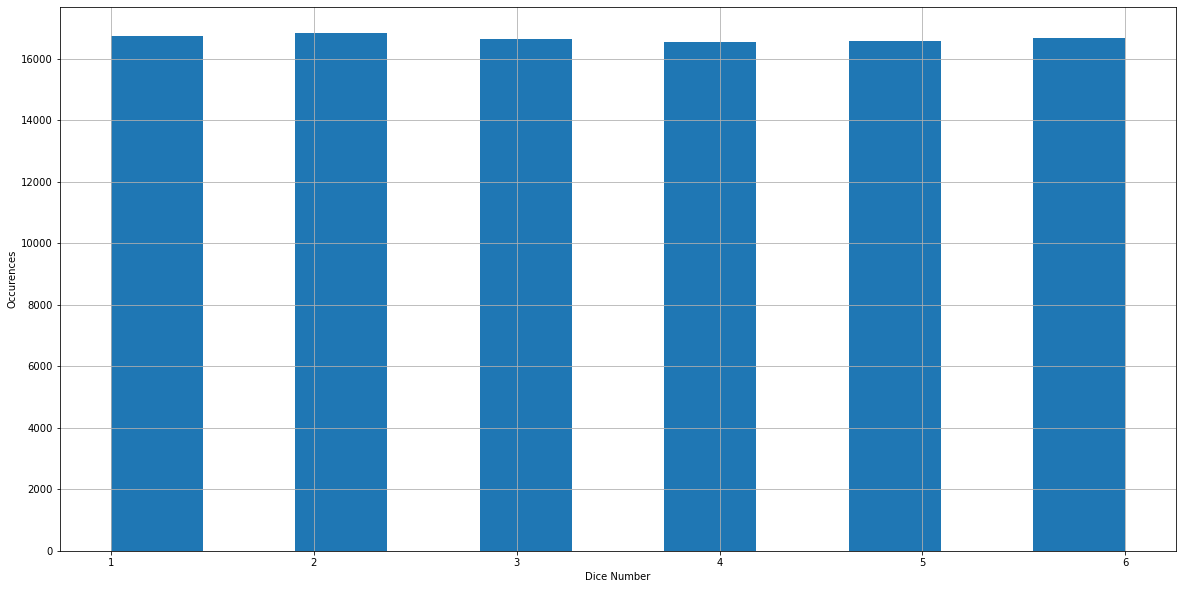

In [4]:
plt.figure(figsize = (20,10))
plt.hist(series, bins = 11, align = 'mid')
plt.xlabel('Dice Number')
plt.ylabel('Occurences')
plt.grid()
plt.show()

In [5]:
#p(X<=3)
len([x for x in series if x<=3])/float(len(series))

0.50217

In [6]:
np.mean(series)

3.49369

In [8]:
def trial():
    number = [1,2,3,4,5,6,7,8,9,10]
    a = random.choice(number)
    
    if a <= 7:
        return 1
    else:
        return 0

def binomial(number):
    l = []
    for i in range(10000):
        res = [trial() for i in range(10)]
        l.append(sum(res))
    return len([x for x in l if x == number])/float(len(l))

In [9]:
prob = []
for i in range(1,11):
    prob.append(binomial(i))
    
prob_s = pd.Series(prob, index = range(1,11))
prob_s

1     0.0000
2     0.0015
3     0.0106
4     0.0383
5     0.0992
6     0.1993
7     0.2630
8     0.2328
9     0.1202
10    0.0289
dtype: float64

In [14]:
#exact value of p(x=7):
float(math.factorial(10)/(math.factorial(7)*math.factorial(10-7))
      *(0.7**7)*(0.3**3))

0.2668279319999998

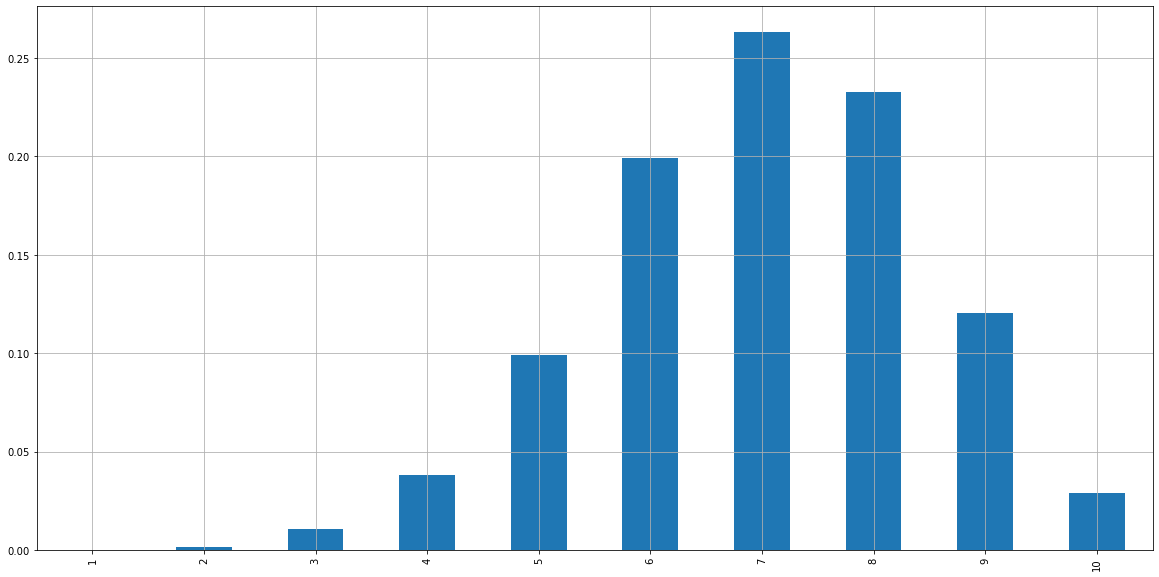

In [18]:
plt.figure(figsize=(20,10))
prob_s.plot(kind='bar')
plt.grid()
plt.show()

In [24]:
spy_table = quandl.get('WIKI/AAPL')
spy = spy_table.loc['2009':'2017',['Open','Close']]
spy['log_return'] = np.log(spy.Close).diff()
spy = spy.dropna()

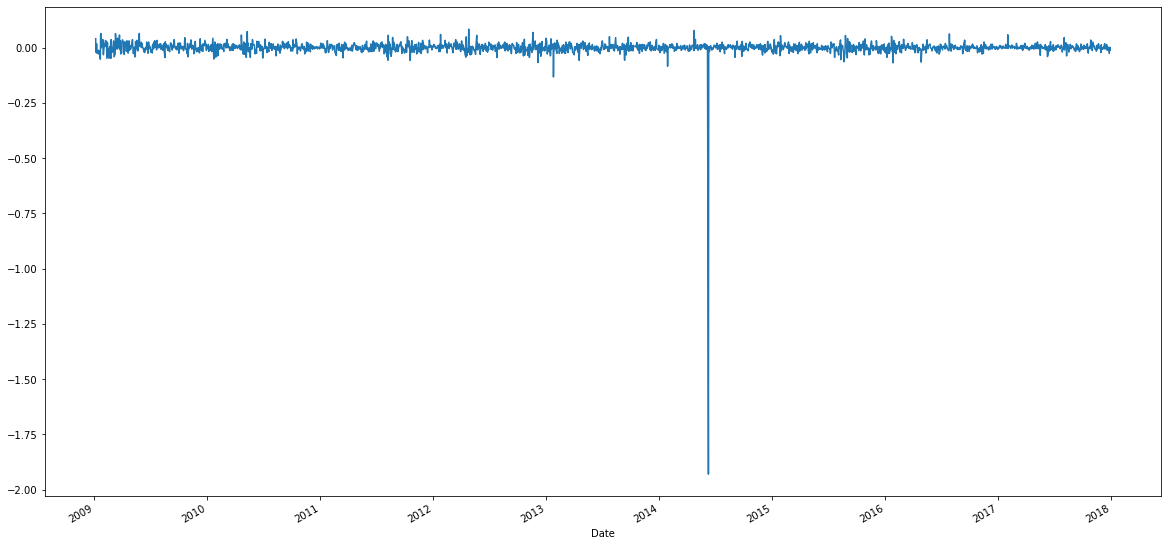

In [25]:
plt.figure(figsize = (20,10))
spy.log_return.plot()
plt.show()

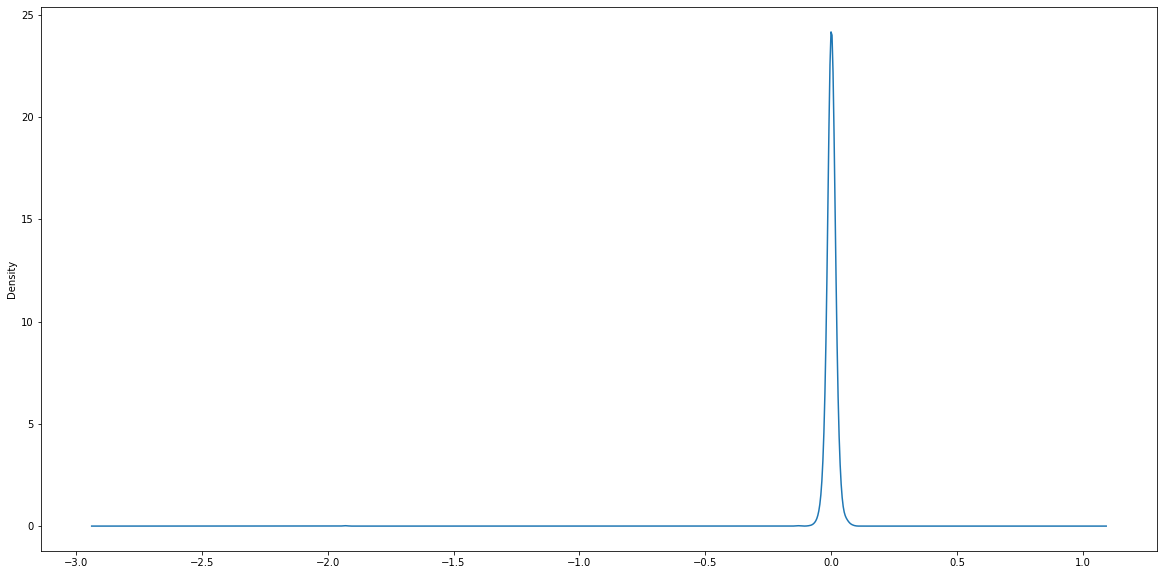

In [26]:
plt.figure(figsize = (20,10))
spy.log_return.plot.density()
plt.show()

In [27]:
de_2 = pd.Series(np.random.normal(0,2,10000),name = 'μ = 0, σ = 2')
de_3 = pd.Series(np.random.normal(0,3,10000),name = 'μ = 0, σ = 3')
de_0 = pd.Series(np.random.normal(0,0.5,10000), name ='μ = 0, σ = 0.5')
mu_1 = pd.Series(np.random.normal(-2,1,10000),name ='μ = -2, σ = 1')
df = pd.concat([de_2,de_3,de_0,mu_1],axis = 1)

<Figure size 1440x720 with 0 Axes>

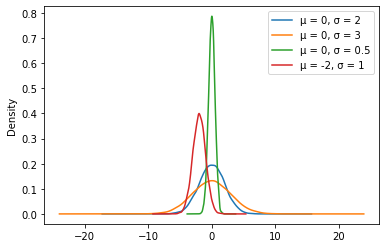

In [28]:
plt.figure(figsize=(20,10))
df.plot.density()
plt.show()